In [1]:
#Load packages
from netCDF4 import Dataset
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import sys
import netCDF4 as nc4
from torch import nn
from torch import optim
import progressbar
import pytorch_lightning as pl
import torch.nn.functional as F
from torchvision import transforms
from torch import nn
from torch import optim
import progressbar
sys.path.append("/home2/datahome/tpicard/PhD_MOMOPAR/TRAIN_AND_VALIDATION_CNN/")
import torch
from torch.utils.data import DataLoader, Dataset
from CNN_tools import *
from CNN_UNET import *
from pytorch_lightning.callbacks import ModelCheckpoint
from DATALOADER import Pdf_Image_DataSet
from variables import *


In [2]:
def get_input(dt,pos,image_norm_eval):


    images_norm_sample = image_norm_eval[dt:dt+4,:,:,:]
    images_norm_sample = images_norm_sample[:,:,:,:].reshape(68,520,520)
    images_norm_sample = image_selector(pos,images_norm_sample)
    images_norm_sample = spatial_downscalling(images_norm_sample,coef_pooling)
    #images_norm_sample = images_norm_sample.reshape(4,17,100,100)

    return(images_norm_sample)

def image_concat(temperature,vorticity,u,v,ssh):

    # Normalization of images
    '''
    temperature_norm = Normalization(temperature)
    vorticity_norm = Normalization(vorticity)
    u_norm = Normalization(u)
    v_norm = Normalization(v)
    ssh_norm = Normalization(ssh)
    '''
    
    #Nan removed
    temperature_norm = nan_to_0(temperature)
    vorticity_norm = nan_to_0(vorticity)
    u_norm = nan_to_0(u)
    v_norm = nan_to_0(v)
    ssh_norm = nan_to_0(ssh)

    # Compilation of all the variable into one vector
    image_norm = np.concatenate((temperature_norm,vorticity_norm,u_norm,v_norm,ssh_norm),axis=1)

    return image_norm


In [42]:
images.shape

(242, 17, 520, 520)

In [4]:
# Train data 
(temperature,vorticity,u,v,ssh) = load_raw_images_train()
images = image_concat(temperature,vorticity,u,v,ssh)

nb_dx = 100
nb_dt = images.shape[0] - 4
nb_cases = nb_dt*36 

folder = ' /home2/scratch/tpicard/DATA_CNN/image_inputs/'
#nc_name = 'inputs_validation_date_{0:04}_{1:04}.nc'.format(dt0,dtend)
nc_name = 'inputs_train_data_no_normalize.nc'

file = folder + nc_name

nc = nc4.Dataset(file,'w')

    #Dimensions used
nc.createDimension('size', nb_dx)
nc.createDimension('zdim', 68)
nc.createDimension('nb_case',nb_cases)
nc.createVariable('images', 'f4', ('nb_case','zdim','size', 'size'))
nc.close()

t=0
for i in range(nb_dt):
    for pos in range(0,36):
        images_i = get_input(i,pos,images)
        nc = nc4.Dataset(file,'r+')
        nc.variables['images'][t,:,:,:] = images_i
        nc.close()
        t=t+1
    print(str(i)+' Done')


0 Done
1 Done
2 Done
3 Done
4 Done
5 Done
6 Done
7 Done
8 Done
9 Done
10 Done
11 Done
12 Done
13 Done
14 Done
15 Done
16 Done
17 Done
18 Done
19 Done
20 Done
21 Done
22 Done
23 Done
24 Done
25 Done
26 Done
27 Done
28 Done
29 Done
30 Done
31 Done
32 Done
33 Done
34 Done
35 Done
36 Done
37 Done
38 Done
39 Done
40 Done
41 Done
42 Done
43 Done
44 Done
45 Done
46 Done
47 Done
48 Done
49 Done
50 Done
51 Done
52 Done
53 Done
54 Done
55 Done
56 Done
57 Done
58 Done
59 Done
60 Done
61 Done
62 Done
63 Done
64 Done
65 Done
66 Done
67 Done
68 Done
69 Done
70 Done
71 Done
72 Done
73 Done
74 Done
75 Done
76 Done
77 Done
78 Done
79 Done
80 Done
81 Done
82 Done
83 Done
84 Done
85 Done
86 Done
87 Done
88 Done
89 Done
90 Done
91 Done
92 Done
93 Done
94 Done
95 Done
96 Done
97 Done
98 Done
99 Done
100 Done
101 Done
102 Done
103 Done
104 Done
105 Done
106 Done
107 Done
108 Done
109 Done
110 Done
111 Done
112 Done
113 Done
114 Done
115 Done
116 Done
117 Done
118 Done
119 Done
120 Done
121 Done
122 Done
123

In [6]:
# Validation data
(temperature,vorticity,u,v,ssh) = load_raw_images_validation()
images = image_concat(temperature,vorticity,u,v,ssh)

nb_dx = 100
nb_dt = images.shape[0]-4
nb_cases = nb_dt*36 

folder = ' /home2/scratch/tpicard/DATA_CNN/image_inputs/'
#nc_name = 'inputs_validation_date_{0:04}_{1:04}.nc'.format(dt0,dtend)
nc_name = 'inputs_validation_data_no_normalize.nc'

file = folder + nc_name

nc = nc4.Dataset(file,'w')

    #Dimensions used
nc.createDimension('size', nb_dx)
nc.createDimension('zdim', 68)
nc.createDimension('nb_case',nb_cases)
nc.createVariable('images', 'f4', ('nb_case','zdim','size', 'size'))
nc.close()

t=0
for i in range(nb_dt):
    for pos in range(0,36):
        images_i = get_input(i,pos,images)
        nc = nc4.Dataset(file,'r+')
        nc.variables['images'][t,:,:,:] = images_i
        nc.close()
        t=t+1
    print(str(i)+' Done')

0 Done
1 Done
2 Done
3 Done
4 Done
5 Done
6 Done
7 Done
8 Done
9 Done
10 Done
11 Done
12 Done
13 Done
14 Done
15 Done
16 Done
17 Done
18 Done
19 Done
20 Done
21 Done
22 Done
23 Done
24 Done
25 Done
26 Done
27 Done
28 Done
29 Done
30 Done
31 Done
32 Done
33 Done


In [3]:
# Simu2 data (test)
(temperature,vorticity,u,v,ssh) = load_raw_images_simu2()
images = image_concat(temperature,vorticity,u,v,ssh)

nb_dx = 100
nb_dt = images.shape[0]-4
nb_cases = nb_dt*36 

folder = ' /home2/scratch/tpicard/DATA_CNN/image_inputs/'
#nc_name = 'inputs_validation_date_{0:04}_{1:04}.nc'.format(dt0,dtend)
nc_name = 'inputs_simu2_data_no_normalize.nc'

file = folder + nc_name

nc = nc4.Dataset(file,'w')

    #Dimensions used
nc.createDimension('size', nb_dx)
nc.createDimension('zdim', 68)
nc.createDimension('nb_case',nb_cases)
nc.createVariable('images', 'f4', ('nb_case','zdim','size', 'size'))
nc.close()

t=0
for i in range(nb_dt):
    for pos in range(0,36):
        images_i = get_input(i,pos,images)
        nc = nc4.Dataset(file,'r+')
        nc.variables['images'][t,:,:,:] = images_i
        nc.close()
        t=t+1
    print(str(i)+' Done')

0 Done
1 Done
2 Done
3 Done
4 Done
5 Done
6 Done
7 Done
8 Done
9 Done
10 Done
11 Done
12 Done
13 Done
14 Done
15 Done
16 Done
17 Done
18 Done
19 Done
20 Done
21 Done
22 Done
23 Done
24 Done
25 Done
26 Done
27 Done
28 Done
29 Done
30 Done
31 Done
32 Done
33 Done
34 Done
35 Done
36 Done
37 Done
38 Done
39 Done
40 Done
41 Done
42 Done
43 Done
44 Done
45 Done
46 Done
47 Done
48 Done
49 Done
50 Done
51 Done
52 Done
53 Done
54 Done
55 Done
56 Done
57 Done
58 Done
59 Done
60 Done
61 Done
62 Done
63 Done
64 Done
65 Done
66 Done
67 Done
68 Done
69 Done
70 Done
71 Done
72 Done
73 Done
74 Done
75 Done
76 Done
77 Done
78 Done
79 Done
80 Done
81 Done
82 Done
83 Done
84 Done
85 Done
86 Done
87 Done
88 Done
89 Done
90 Done
91 Done
92 Done
93 Done
94 Done
95 Done
96 Done
97 Done
98 Done
99 Done
100 Done
101 Done
102 Done
103 Done
104 Done
105 Done
106 Done
107 Done
108 Done
109 Done
110 Done
111 Done
112 Done
113 Done
114 Done
115 Done
116 Done
117 Done
118 Done
119 Done
120 Done
121 Done
122 Done
123

In [4]:
(temperature,vorticity,u,v,ssh)  = load_raw_images_simu2()

In [5]:
temperature.shape

(195, 4, 520, 520)

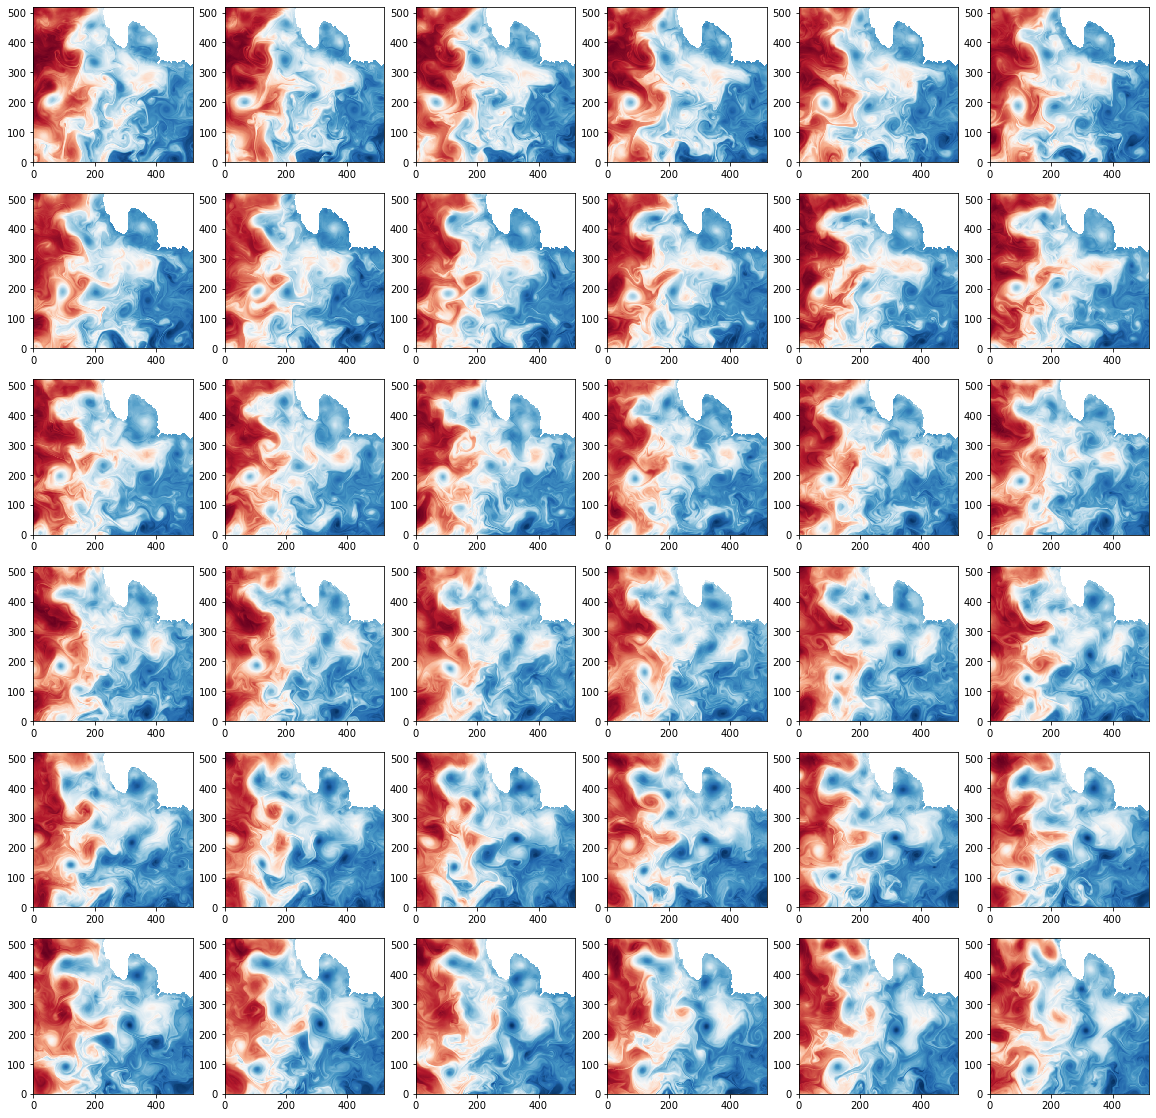

In [19]:
gap = 100
fig = plt.figure(figsize=(20,20))
for i in range(0,36):
    #image = get_input(10,i,image_norm)
    ax = fig.add_subplot(6,6,i+1)
    plt.pcolormesh(temperature_simu1[:,:,-1,gap+i].T,cmap = plt.cm.RdBu)

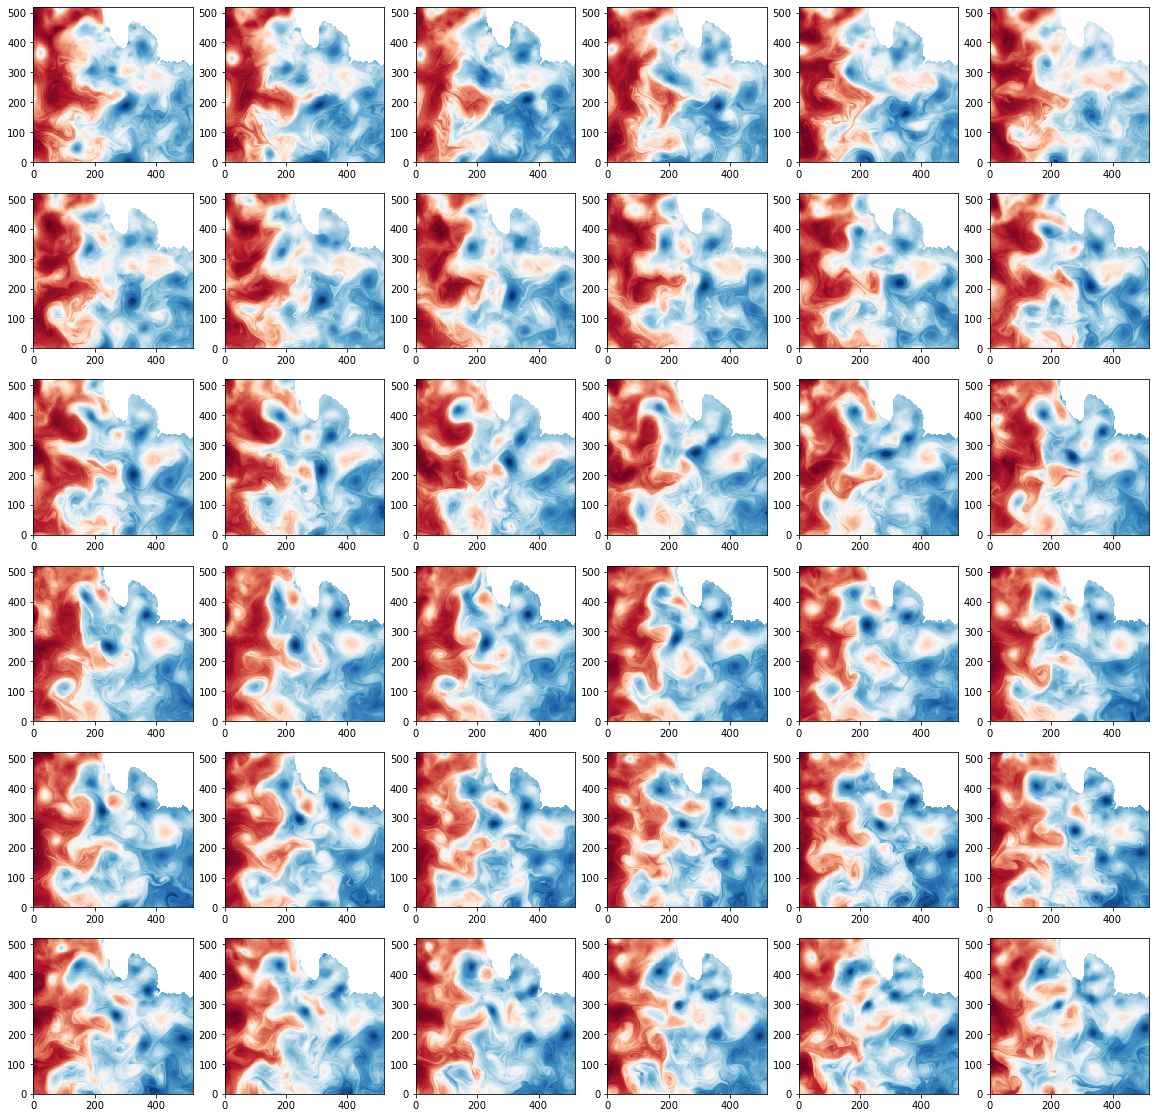

In [20]:

fig = plt.figure(figsize=(20,20))
for i in range(0,36):
    #image = get_input(10,i,image_norm)
    ax = fig.add_subplot(6,6,i+1)
    plt.pcolormesh(temperature_simu2[:,:,-1,gap+i].T,cmap = plt.cm.RdBu)

In [35]:
images_sample_reshape = images_sample.reshape(4,17,100,100)

<ipython-input-39-969964acb8e5>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(lon, lat,images_sample_reshape[0,i,:,:].T,cmap = plt.cm.RdBu)


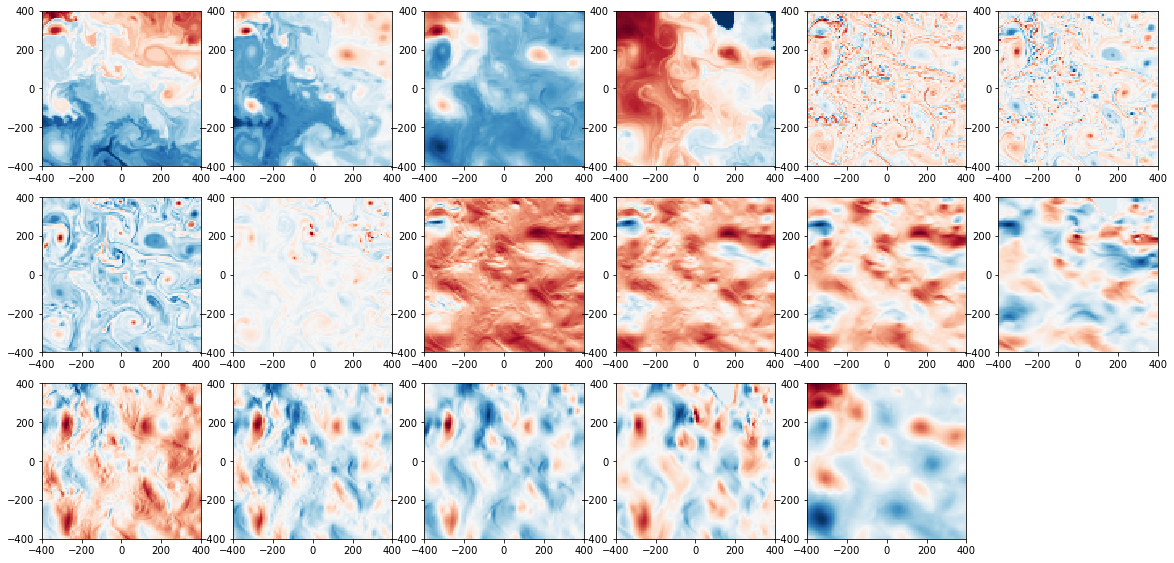

In [39]:
lon = np.linspace(-400,400,nb_dx)
lat = np.linspace(-400,400,nb_dx)
levels = [0.001]

fig = plt.figure(figsize=(20,20))
gap = 0


for i in range(17):
    #image = get_input(10,i,image_norm)
    ax = fig.add_subplot(6,6,i+1)
    plt.pcolormesh(lon, lat,images_sample_reshape[0,i,:,:].T,cmap = plt.cm.RdBu)


In [32]:
nb_dx = 100
#dt0 = 36 
#dtend = 324

dt0 = 36 
dtend = 275
nb_dt = (dtend-dt0)*36

folder = ' /home2/scratch/tpicard/DATA_CNN/image_inputs/'
#nc_name = 'inputs_validation_date_{0:04}_{1:04}.nc'.format(dt0,dtend)
nc_name = 'inputs_train_date_{0:04}_{1:04}.nc'.format(dt0,dtend)

file = folder + nc_name

nc = nc4.Dataset(file,'w')

    #Dimensions used
nc.createDimension('size', nb_dx)
nc.createDimension('zdim', 68)
nc.createDimension('nb_case',nb_dt)
nc.createVariable('images', 'f4', ('nb_case','zdim','size', 'size'))
nc.close()

t=0
for i in range(dt0,dtend):
    for pos in range(0,36):
        images = get_input(i,pos,image_norm)
        nc = nc4.Dataset(file,'r+')
        nc.variables['images'][t,:,:,:] = images
        nc.close()
        t=t+1
    print(str(i)+' Done')

36 Done
37 Done
38 Done
39 Done
40 Done
41 Done
42 Done
43 Done
44 Done
45 Done
46 Done
47 Done
48 Done
49 Done
50 Done
51 Done
52 Done
53 Done
54 Done
55 Done
56 Done
57 Done
58 Done
59 Done
60 Done
61 Done
62 Done
63 Done
64 Done
65 Done
66 Done
67 Done
68 Done
69 Done
70 Done
71 Done
72 Done
73 Done
74 Done
75 Done
76 Done
77 Done
78 Done
79 Done
80 Done
81 Done
82 Done
83 Done
84 Done
85 Done
86 Done
87 Done
88 Done
89 Done
90 Done
91 Done
92 Done
93 Done
94 Done
95 Done
96 Done
97 Done
98 Done
99 Done
100 Done
101 Done
102 Done
103 Done
104 Done
105 Done
106 Done
107 Done
108 Done
109 Done
110 Done
111 Done
112 Done
113 Done
114 Done
115 Done
116 Done
117 Done
118 Done
119 Done
120 Done
121 Done
122 Done
123 Done
124 Done
125 Done
126 Done
127 Done
128 Done
129 Done
130 Done
131 Done
132 Done
133 Done
134 Done
135 Done
136 Done
137 Done
138 Done
139 Done
140 Done
141 Done
142 Done
143 Done
144 Done
145 Done
146 Done
147 Done
148 Done
149 Done
150 Done
151 Done
152 Done
153 Done
15

In [33]:
nb_dx = 100
#dt0 = 36 
#dtend = 324

dt0 = 285 
dtend = 320
nb_dt = (dtend-dt0)*36

folder = ' /home2/scratch/tpicard/DATA_CNN/image_inputs/'
nc_name = 'inputs_validation_date_{0:04}_{1:04}.nc'.format(dt0,dtend)
#nc_name = 'inputs_train_date_{0:04}_{1:04}.nc'.format(dt0,dtend)

file = folder + nc_name

nc = nc4.Dataset(file,'w')

    #Dimensions used
nc.createDimension('size', nb_dx)
nc.createDimension('zdim', 68)
nc.createDimension('nb_case',nb_dt)
nc.createVariable('images', 'f4', ('nb_case','zdim','size', 'size'))
nc.close()

t=0
for i in range(dt0,dtend):
    for pos in range(0,36):
        images = get_input(i,pos,image_norm)
        nc = nc4.Dataset(file,'r+')
        nc.variables['images'][t,:,:,:] = images
        nc.close()
        t=t+1
    print(str(i)+' Done')

285 Done
286 Done
287 Done
288 Done
289 Done
290 Done
291 Done
292 Done
293 Done
294 Done
295 Done
296 Done
297 Done
298 Done
299 Done
300 Done
301 Done
302 Done
303 Done
304 Done
305 Done
306 Done
307 Done
308 Done
309 Done
310 Done
311 Done
312 Done
313 Done
314 Done
315 Done
316 Done
317 Done
318 Done
319 Done
